<a href="https://colab.research.google.com/github/pinilDissanayaka/Telecom-Customer-Churn-prediction/blob/main/Scripts/%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
pip install Catboost

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [368]:
FIGPATH = '/content/Figures'

In [369]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [370]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [371]:
df.shape

(7043, 21)

This dataset contain 7043 rows and 21 columns.


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [373]:
allColumns = df.columns
catColumns = df.select_dtypes(include=['object']).columns
numColumns = list(set(allColumns) - set(catColumns))



print(f"All columns : {list(allColumns)} \n")
print(f"Categorical columns :  {list(catColumns)} \n")
print(f"Numeric columns : {list(numColumns)} \n")

All columns : ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'] 

Categorical columns :  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'] 

Numeric columns : ['MonthlyCharges', 'SeniorCitizen', 'tenure'] 



**About dataset**
* CustomerId: Customer ID
* Gender: Gender
* SeniorCitizen: Whether the customer is a senior citizen (1, 0)
* Partner: Whether the client has a partner (Yes, No) - Indicates if the customer is married or not
* Dependents: Whether the client has dependents (Yes, No) - Indicates if the customer has children, parents, grandparents, etc.
* Tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has phone service (Yes, No)
* MultipleLines: Whether the customer has more than one line (Yes, No, No phone service)
* InternetService: Customer's internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security (Yes, No, No Internet service)
* OnlineBackup: Whether the customer has online backup (Yes, No, No Internet service)
* DeviceProtection: Whether the customer has device protection (Yes, No, No Internet service)
* TechSupport: Whether the customer receives technical support (Yes, No, No Internet service)
* StreamingTV: Indicates whether the customer has streaming TV (Yes, No, No Internet service) Indicates if the customer uses the Internet service to stream television programs from a third-party provider
* StreamingMovies: Whether the customer has streaming movies (Yes, No, No Internet service) - Indicates if the customer uses the Internet service to stream movies from a third-party provider
* Contract: Duration of the customer's contract (Month to month, One year, Two years)
* PaperlessBilling: Whether the customer receives a paperless bill (Yes, No)
* PaymentMethod: Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: Amount charged to the customer monthly
* TotalCharges: Total amount charged to the customer
* Churn: Whether the customer is using the service or not (Yes or No) - Refers to customers who left in the last month or quarter

In [374]:
df.duplicated().sum()

0

This dataset doesn't contain duplicate values.


In [375]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

This dataset doesn't contain any NA values.



In [378]:
print("Statistical summary of the DataFrame:")
df.describe().T

Statistical summary of the DataFrame:


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [379]:
df.drop(columns=["customerID"], inplace =True)

In [380]:
allColumns = df.columns
catColumns = df.select_dtypes(include=['object']).columns
numColumns = list(set(allColumns) - set(catColumns))



print(f"All columns : {list(allColumns)} \n")
print(f"Categorical columns :  {list(catColumns)} \n")
print(f"Numeric columns : {list(numColumns)} \n")

All columns : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'] 

Categorical columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'] 

Numeric columns : ['MonthlyCharges', 'SeniorCitizen', 'tenure'] 



In [381]:
for column in allColumns:
  print(f"\n{column} column contain :\n")
  print(f"data type of {column} : {df[column].dtype}")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")


gender column contain :

data type of gender : object
['Female' 'Male']

Male      3555
Female    3488
Name: gender, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

SeniorCitizen column contain :

data type of SeniorCitizen : int64
[0 1]

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Partner column contain :

data type of Partner : object
['Yes' 'No']

No     3641
Yes    3402
Name: Partner, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Dependents column contain :

data type of Dependents : object
['No' 'Yes']

No     4933
Yes    2110
Name: Dependents, dty

In [382]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0 : 'No', 1 : 'Yes'})

In [383]:
for column in allColumns:
  print(f"\n{column} column contain :\n")
  print(f"data type of {column} : {df[column].dtype}")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")


gender column contain :

data type of gender : object
['Female' 'Male']

Male      3555
Female    3488
Name: gender, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

SeniorCitizen column contain :

data type of SeniorCitizen : object
['No' 'Yes']

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Partner column contain :

data type of Partner : object
['Yes' 'No']

No     3641
Yes    3402
Name: Partner, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Dependents column contain :

data type of Dependents : object
['No' 'Yes']

No     4933
Yes    2110
Name: Dep

TotalCharges column has some ' ' values. Let make them as a NA values and convert it as a numeric column.

In [384]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [385]:
for column in allColumns:
  print(f"\n{column} column contain :\n")
  print(f"data type of {column} : {df[column].dtype}")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")


gender column contain :

data type of gender : object
['Female' 'Male']

Male      3555
Female    3488
Name: gender, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

SeniorCitizen column contain :

data type of SeniorCitizen : object
['No' 'Yes']

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Partner column contain :

data type of Partner : object
['Yes' 'No']

No     3641
Yes    3402
Name: Partner, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Dependents column contain :

data type of Dependents : object
['No' 'Yes']

No     4933
Yes    2110
Name: Dep

In [386]:
allColumns = df.columns
catColumns = df.select_dtypes(include=['object']).columns
numColumns = list(set(allColumns) - set(catColumns))



print(f"All columns : {list(allColumns)} \n")
print(f"Categorical columns :  {list(catColumns)} \n")
print(f"Numeric columns : {list(numColumns)} \n")

All columns : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'] 

Categorical columns :  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 

Numeric columns : ['TotalCharges', 'MonthlyCharges', 'tenure'] 



In [387]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now TotalCharges column has 11 null values.

In [388]:
print(f"It is a {df['TotalCharges'].isnull().sum() / df.shape[0] * 100} % from the distribution.")

It is a 0.1561834445548772 % from the distribution.


In [389]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [390]:
df[df['tenure'] <= 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [391]:
df[df["TotalCharges"].isnull()]["MonthlyCharges"]

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: MonthlyCharges, dtype: float64

In [392]:
df[df["TotalCharges"].isnull()]["tenure"]

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64

Dataset where the information on the "TotalCharges" of customers who have stayed with the company for less than one month is missing. In such cases, we can use the data from their "MonthlyCharges" column to impute or estimate the missing values for "TotalCharges."*italicized text*

In [393]:
df['TotalCharges'].fillna(value=df[df["TotalCharges"].isnull()]["MonthlyCharges"], inplace =True)

In [394]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [395]:
for column in allColumns:
  print(f"\n{column} column contain :\n")
  print(f"data type of {column} : {df[column].dtype}")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")


gender column contain :

data type of gender : object
['Female' 'Male']

Male      3555
Female    3488
Name: gender, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

SeniorCitizen column contain :

data type of SeniorCitizen : object
['No' 'Yes']

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Partner column contain :

data type of Partner : object
['Yes' 'No']

No     3641
Yes    3402
Name: Partner, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Dependents column contain :

data type of Dependents : object
['No' 'Yes']

No     4933
Yes    2110
Name: Dep

In [396]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6534
Churn                  2
dtype: int64

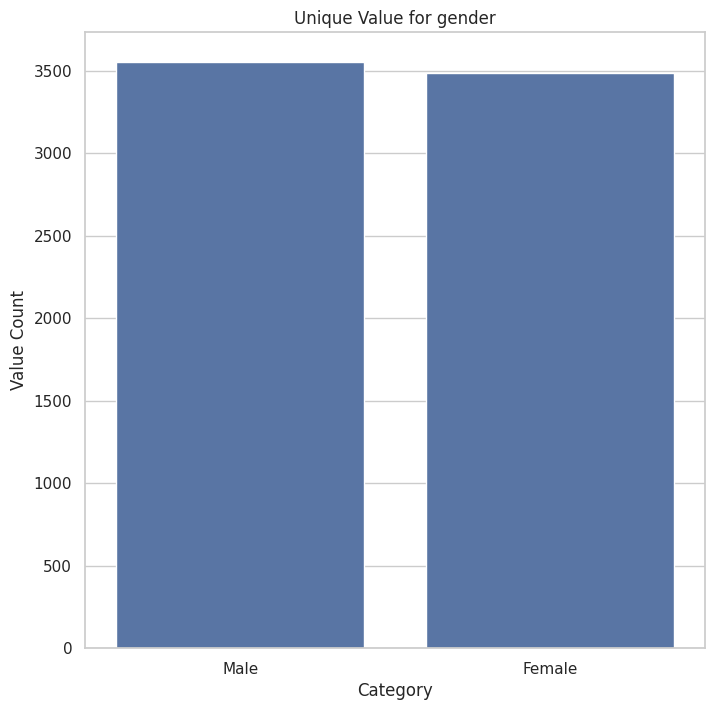

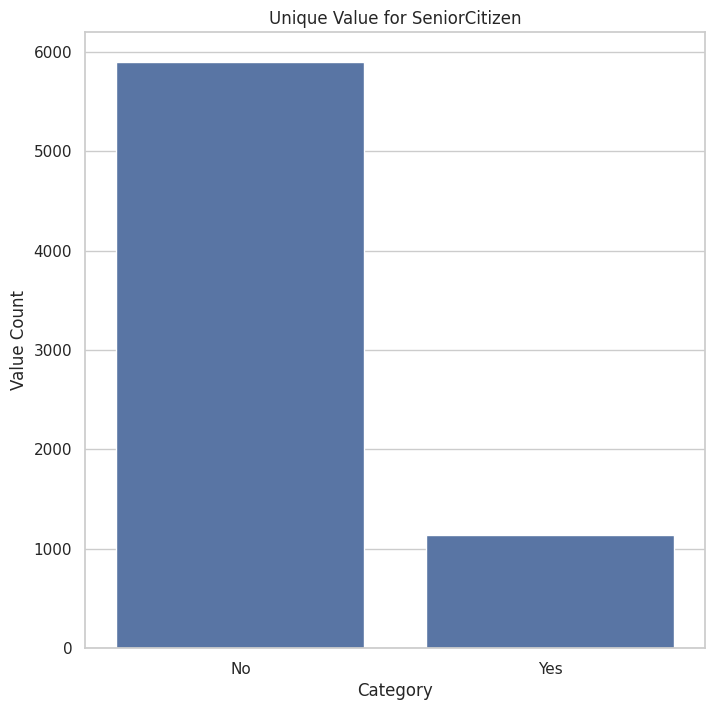

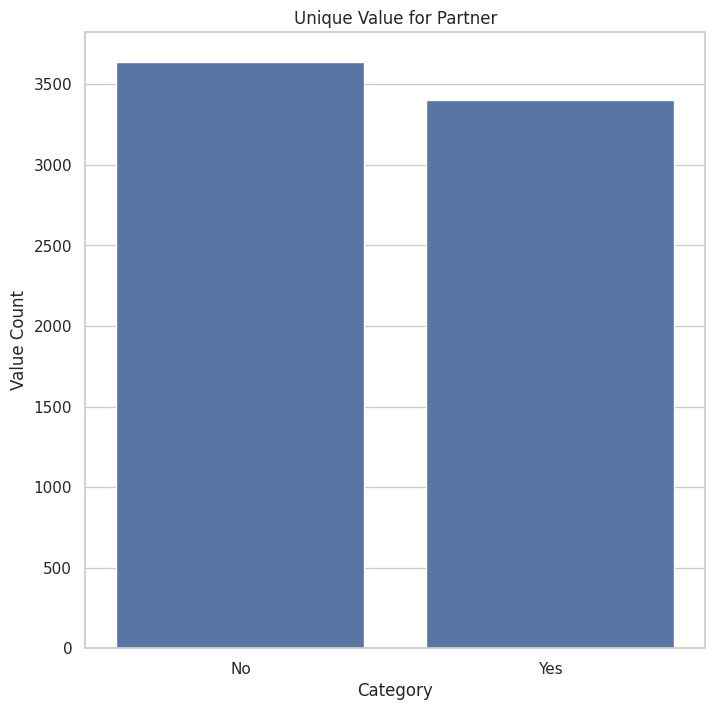

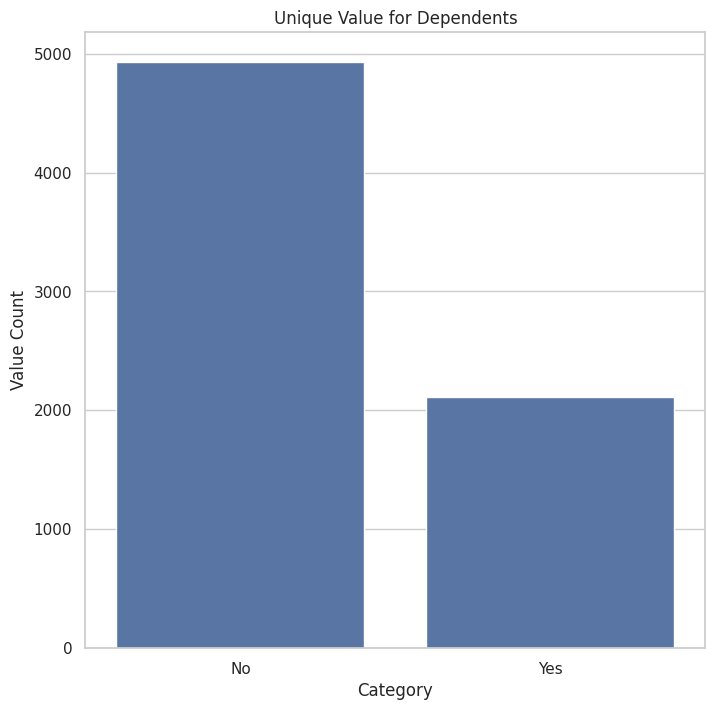

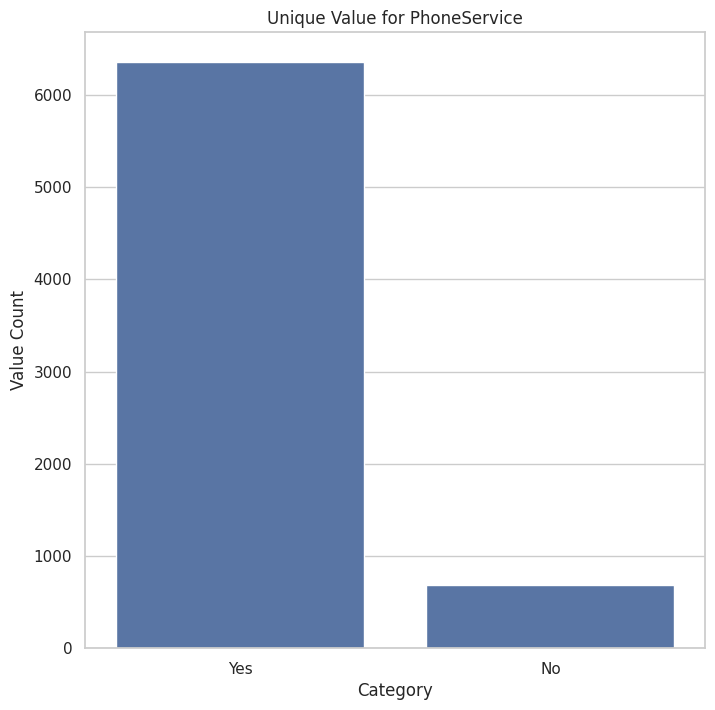

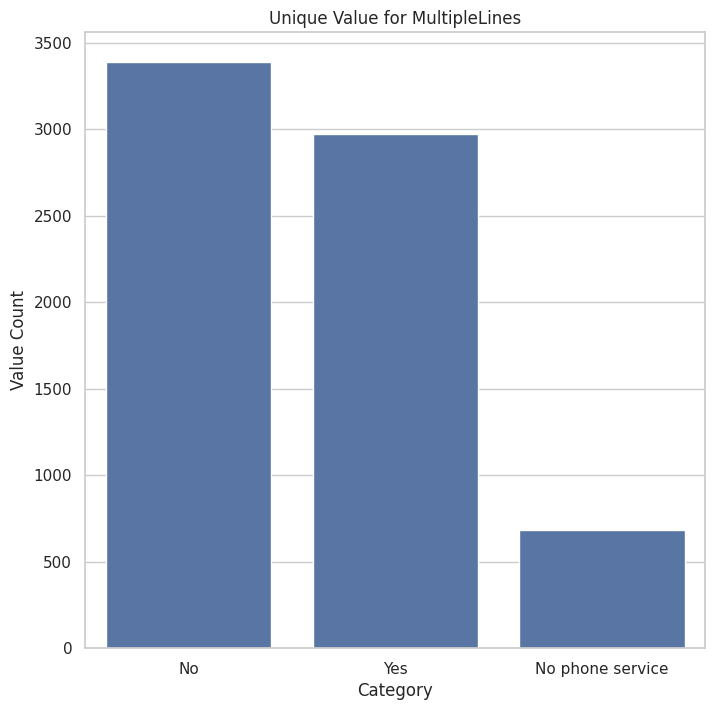

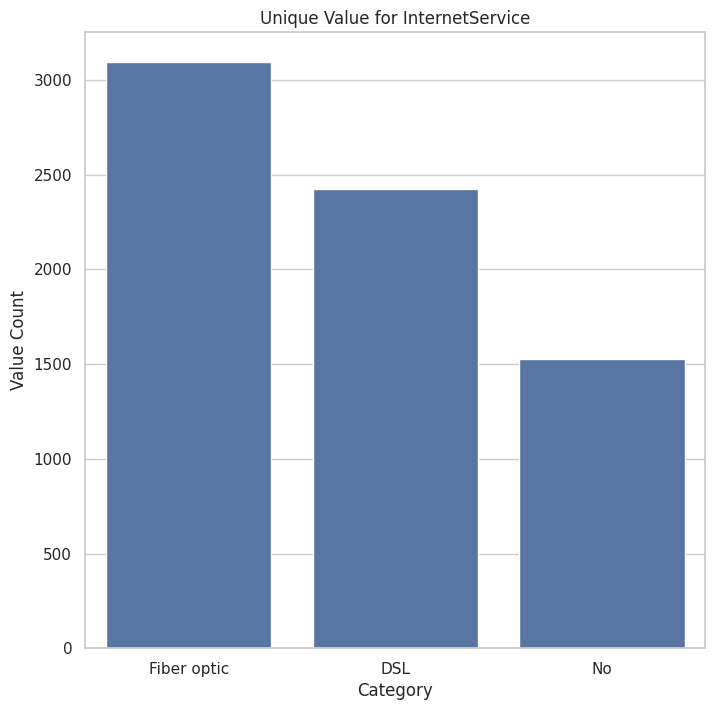

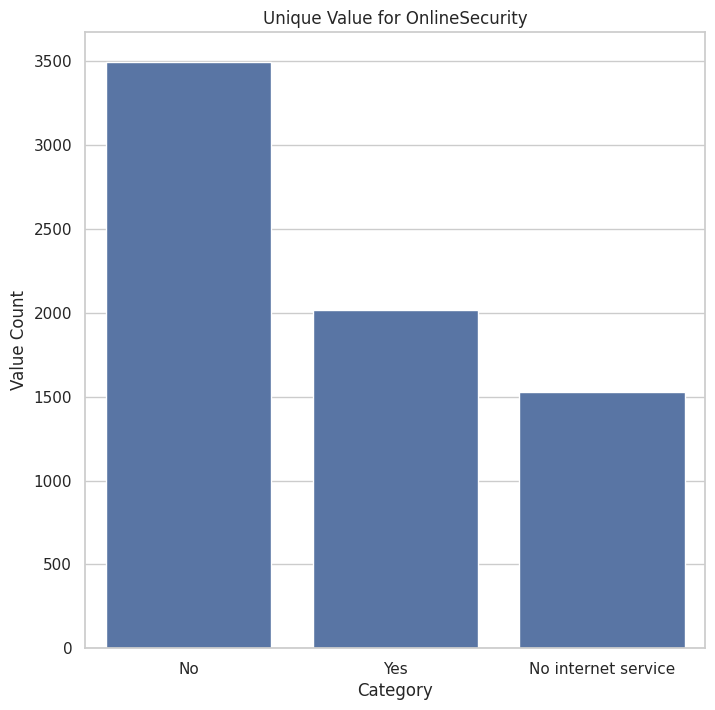

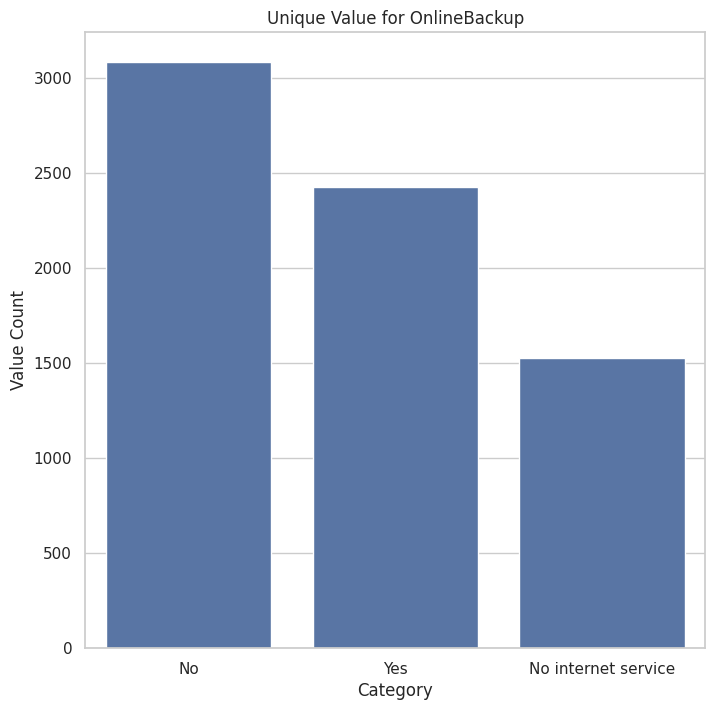

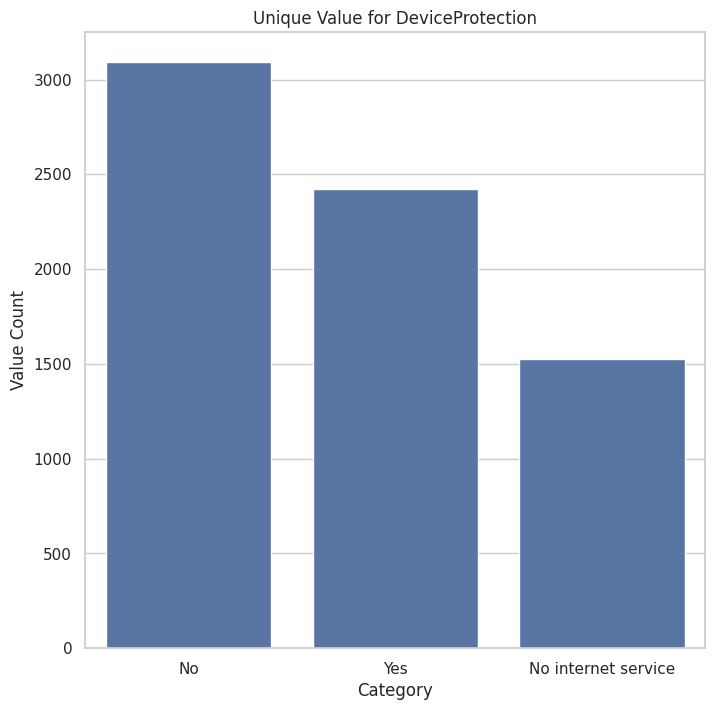

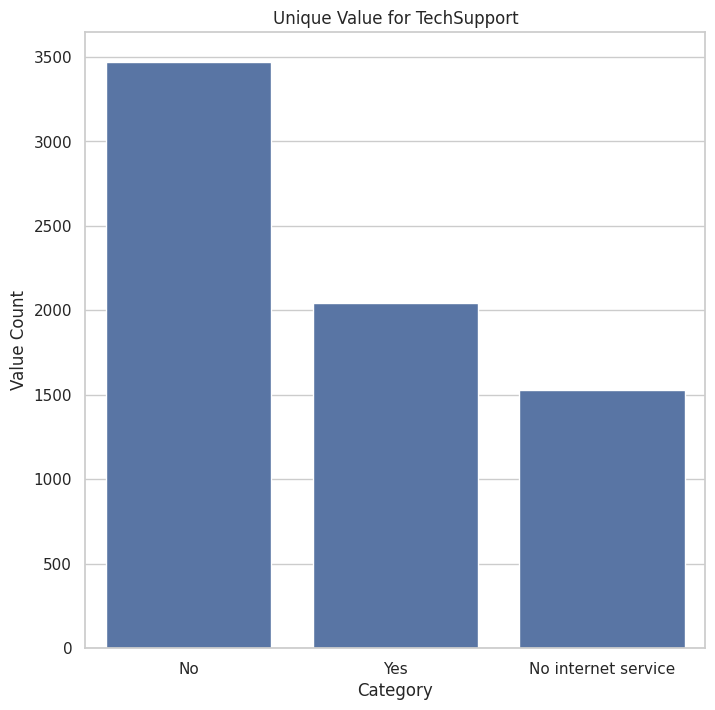

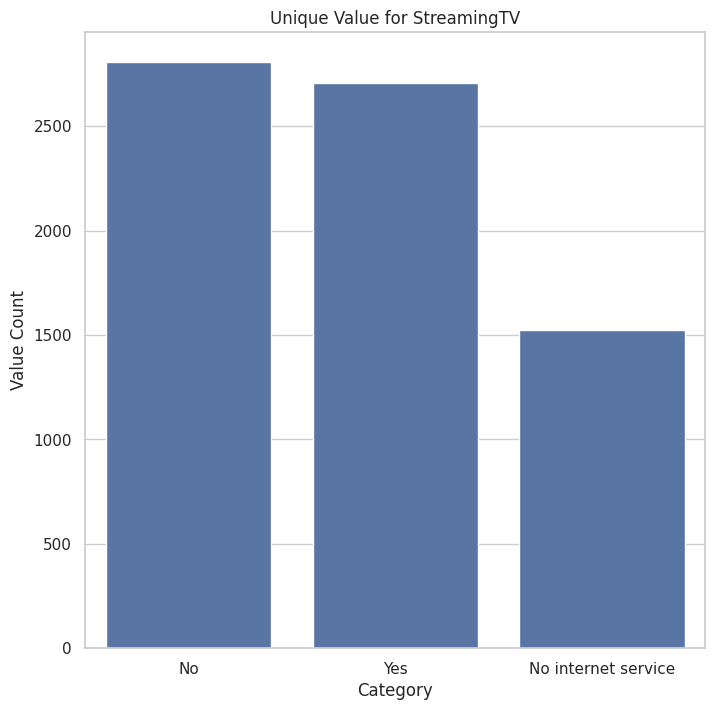

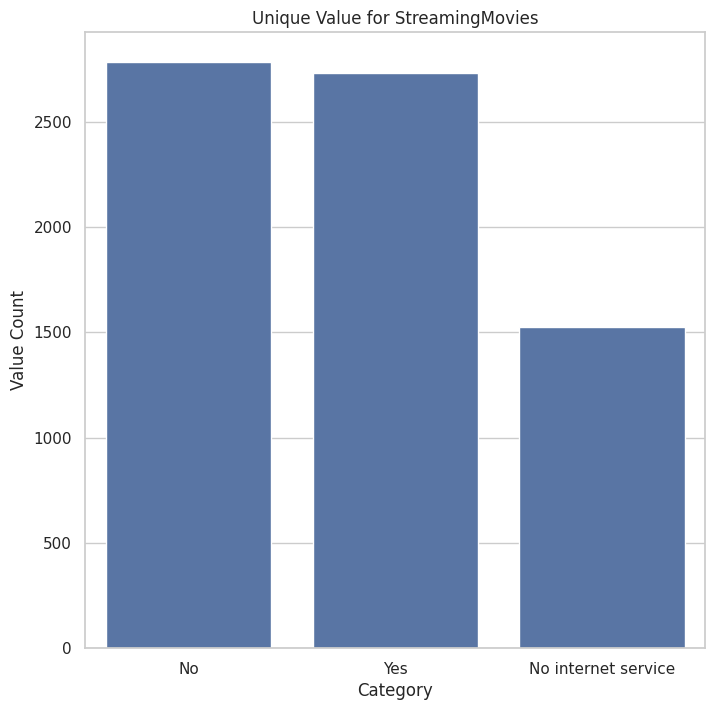

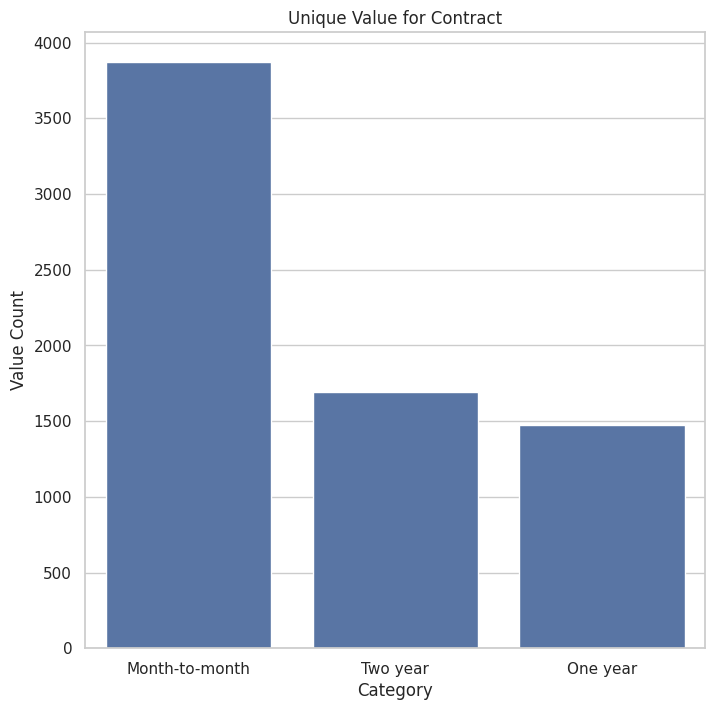

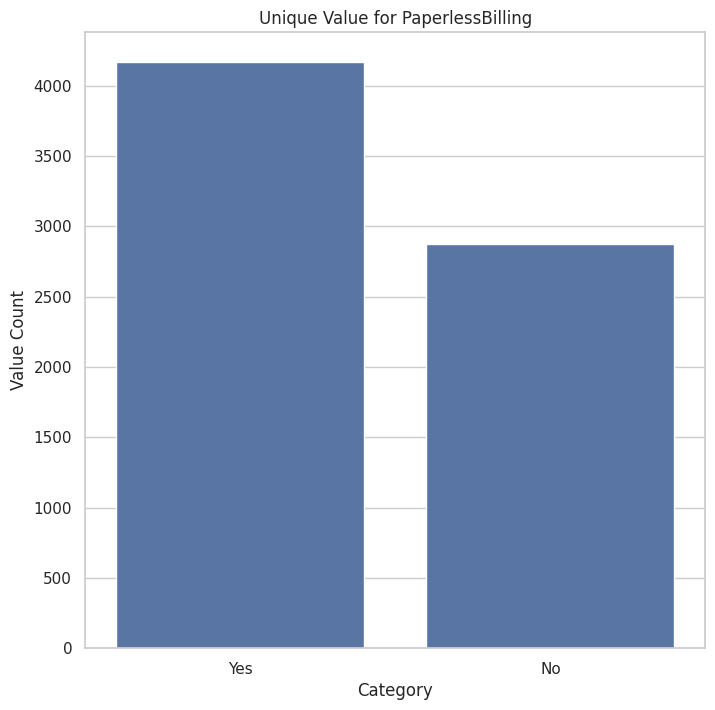

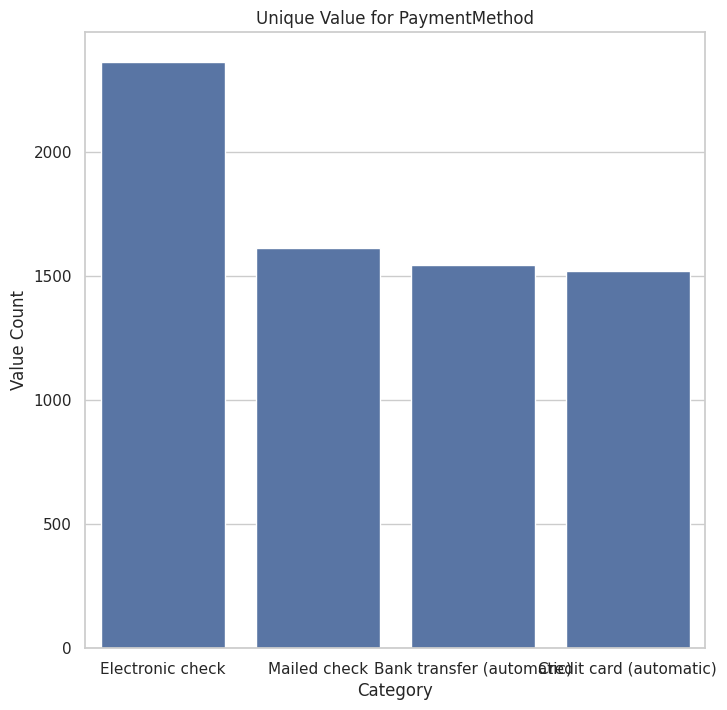

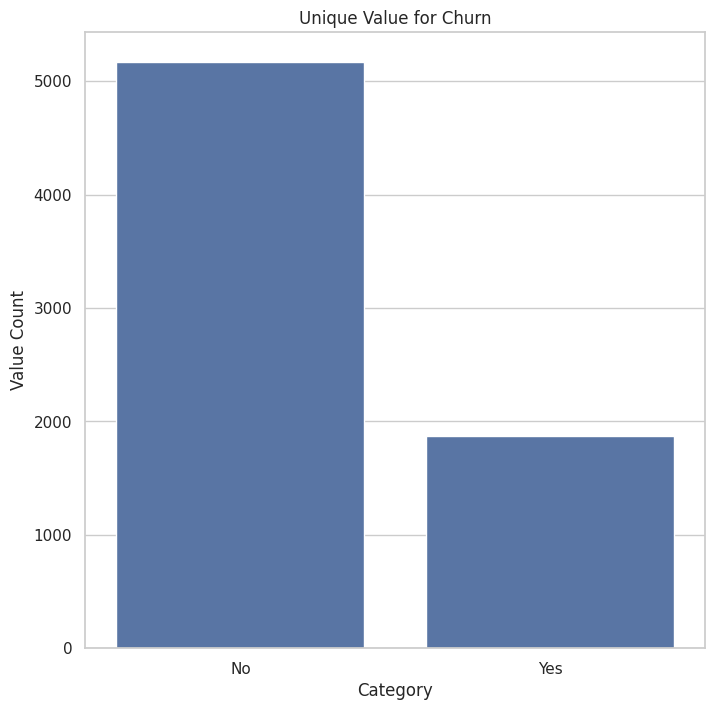

In [397]:
# Plotting bar graphs for each categorical column
for column in catColumns:
  valueCount = df[column].value_counts()
  plt.figure(figsize = (8, 8))
  plt.title(f'Unique Value for {column}')
  plt.xlabel('Category')
  plt.ylabel('Value Count')
  sns.barplot(x = valueCount.index, y = valueCount.values)
  plt.savefig(os.path.join(FIGPATH, f"Unique Value for {column}.png"))
  plt.show()

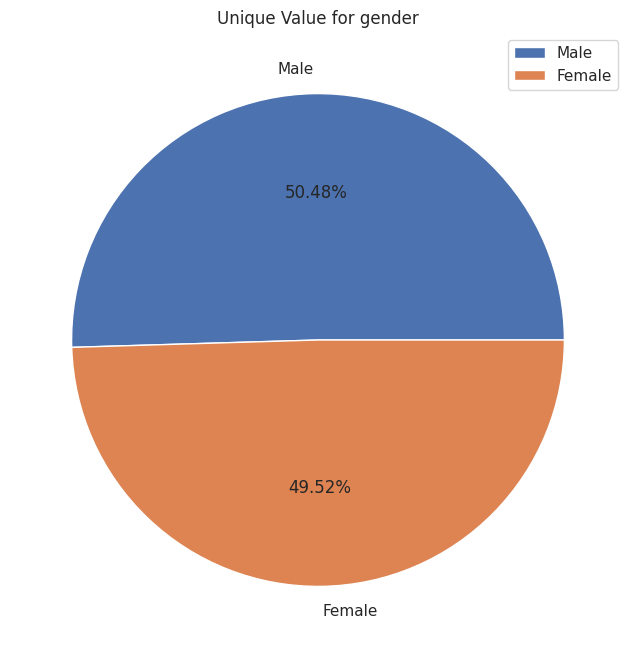

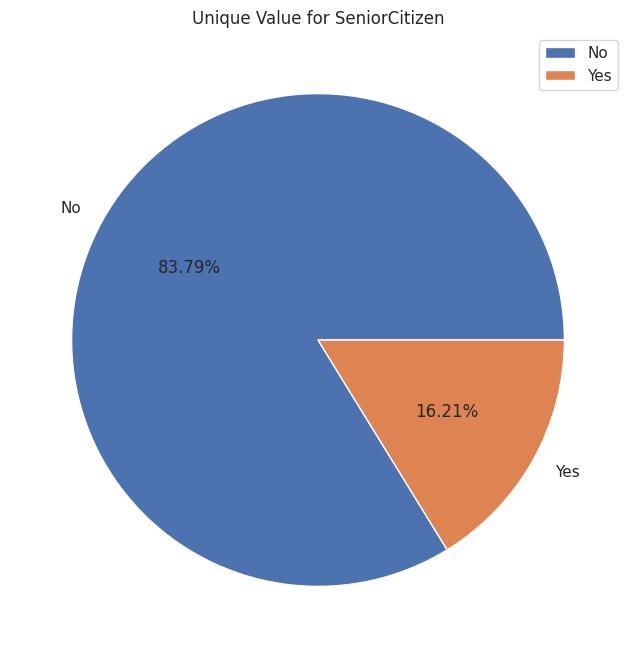

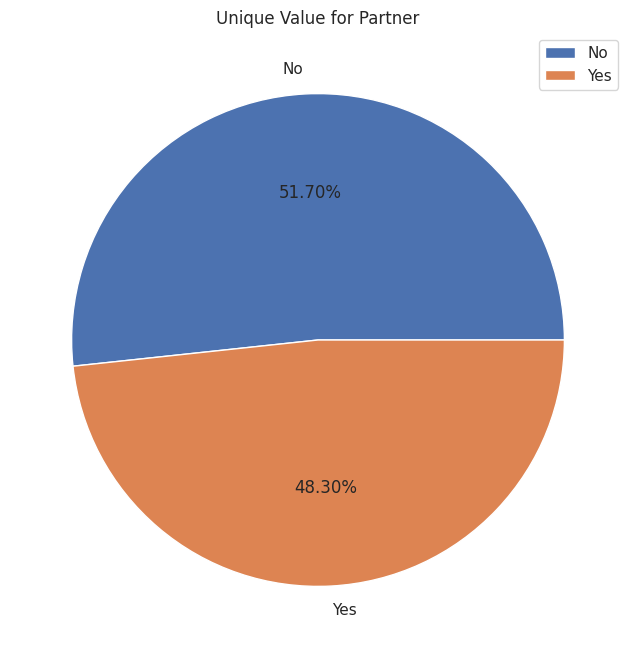

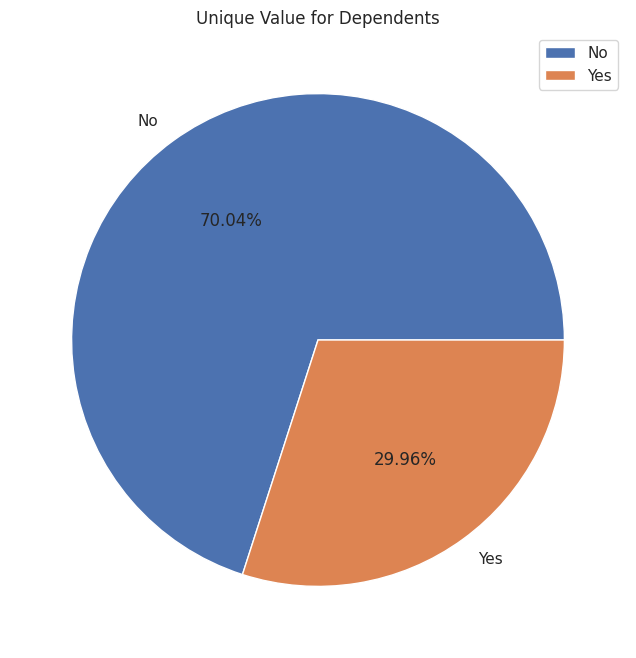

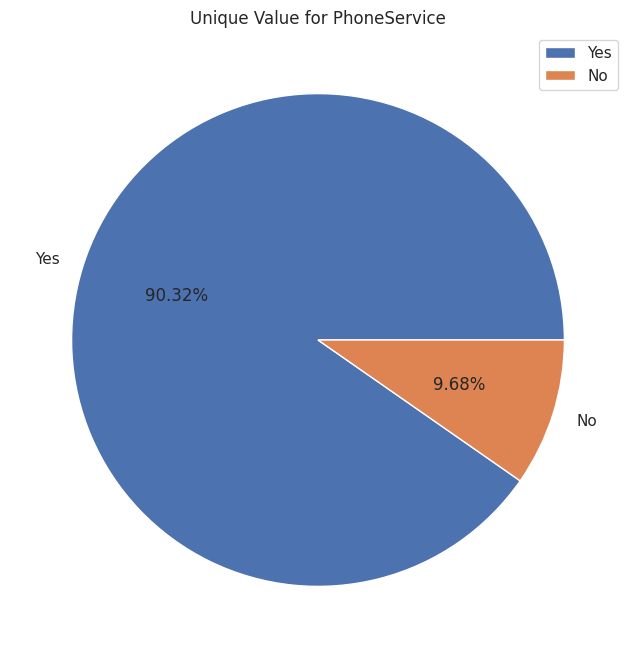

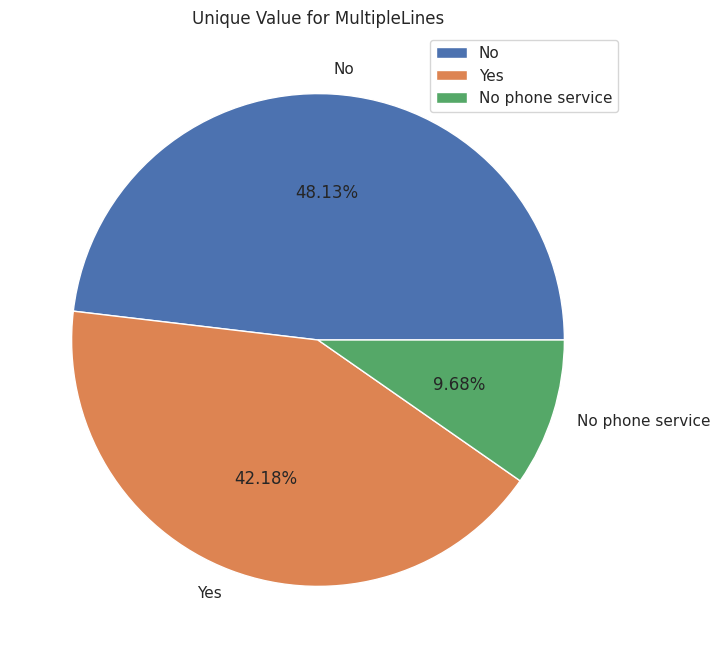

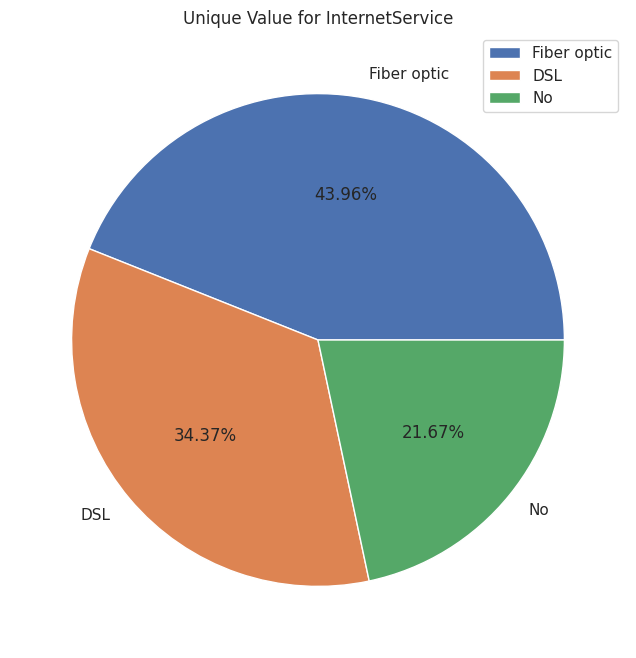

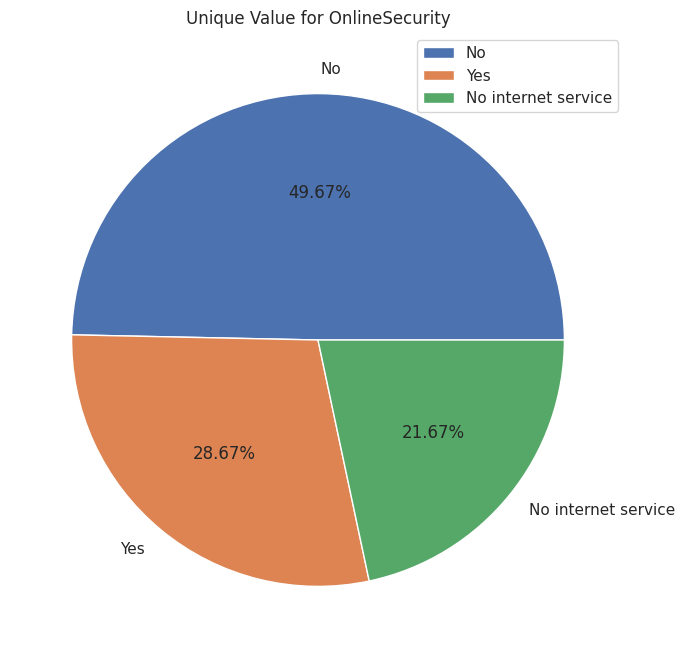

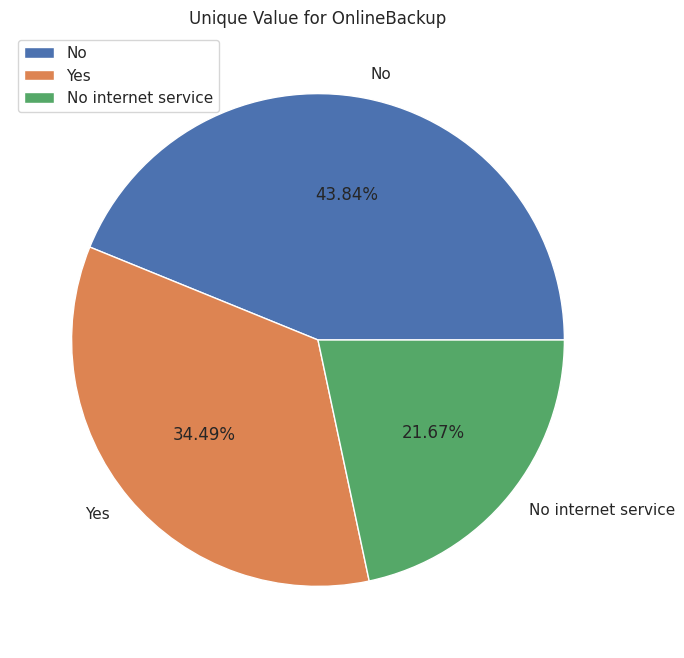

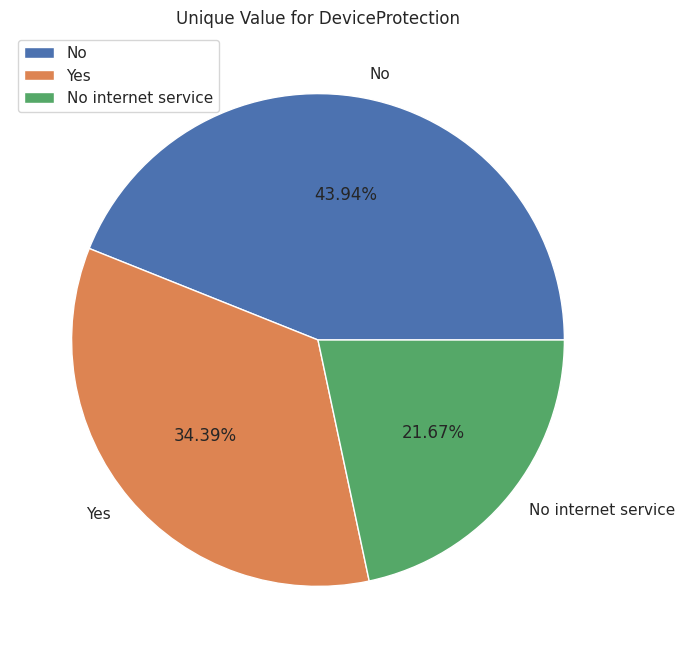

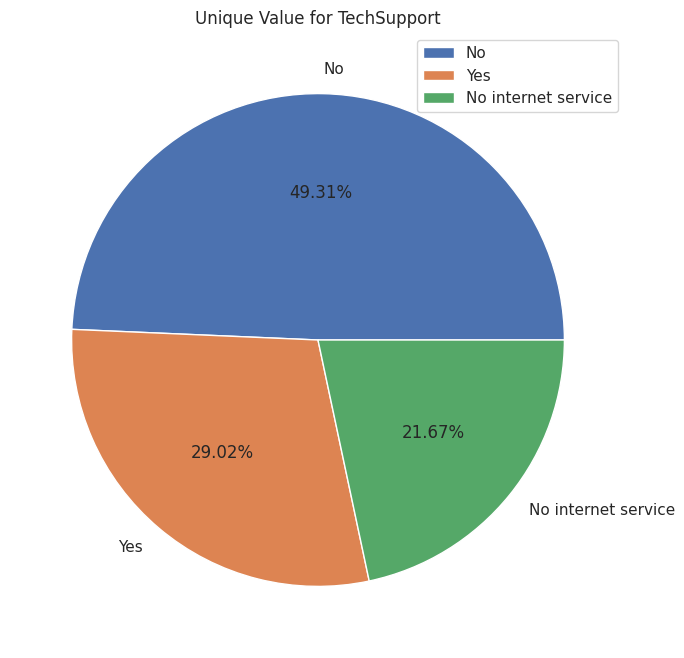

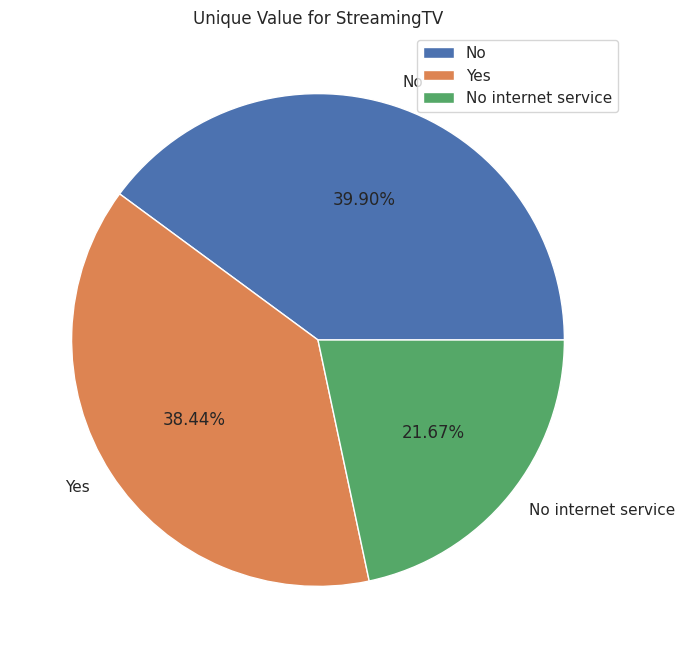

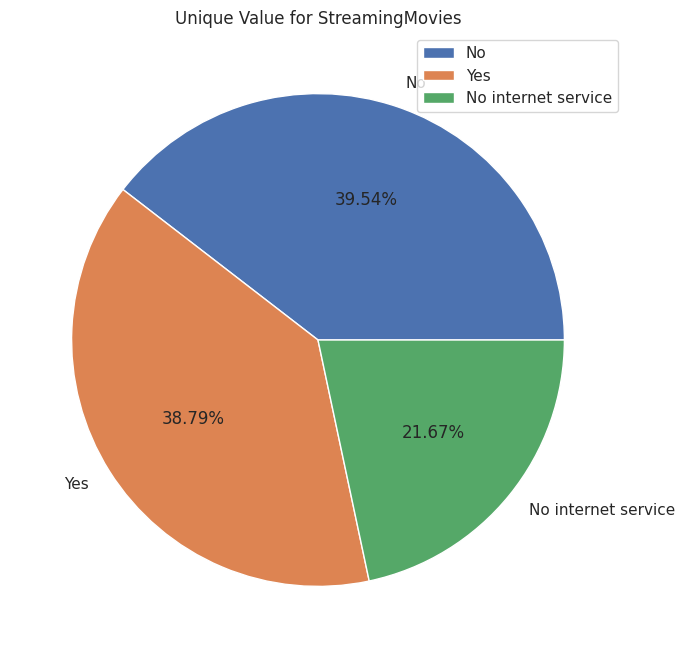

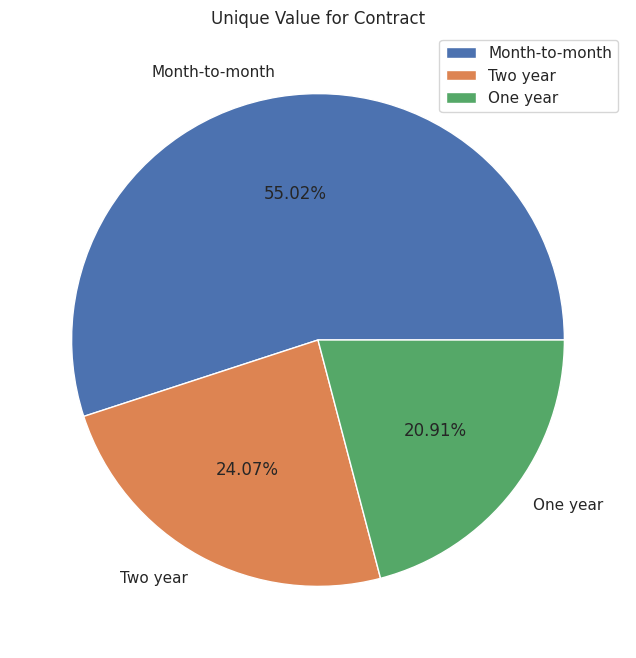

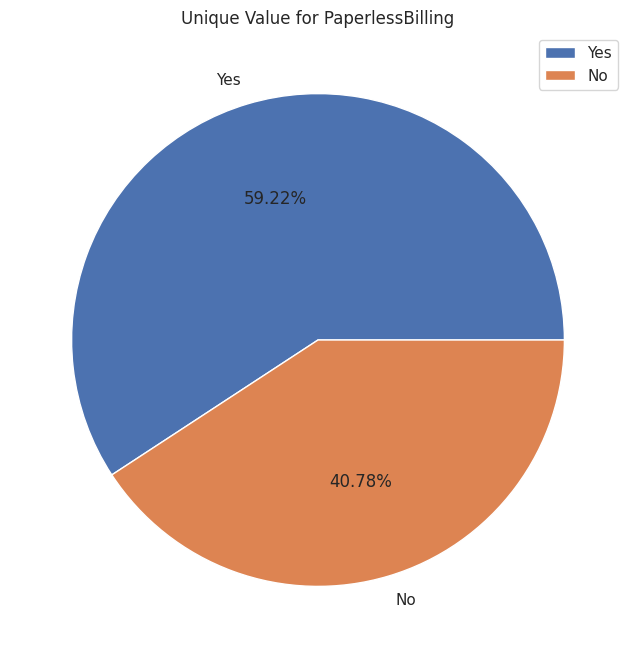

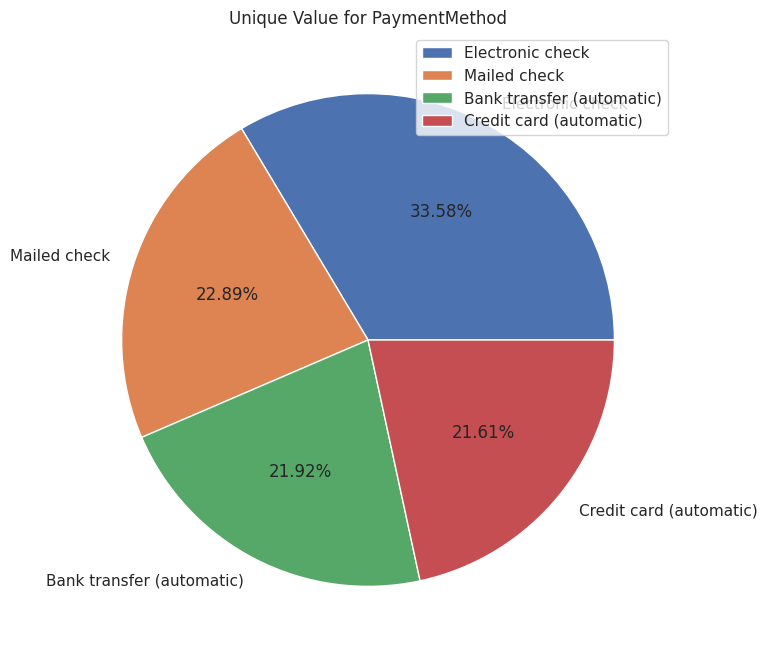

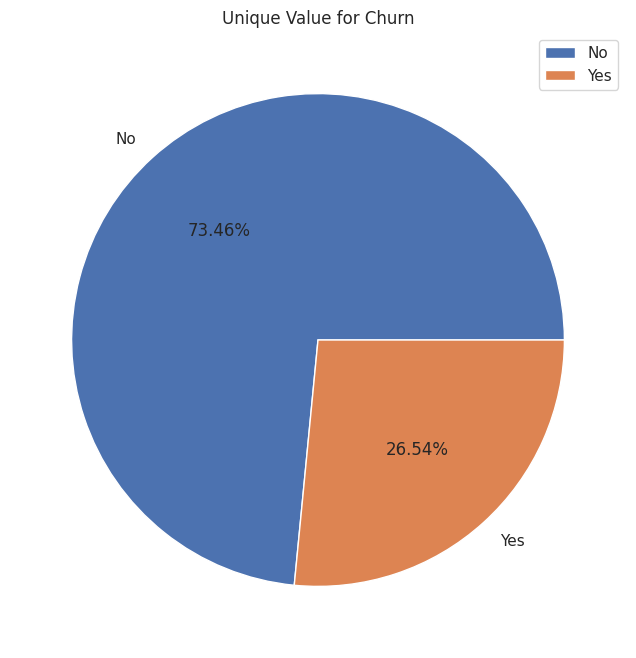

In [398]:
# Plotting pie graphs for each categorical column
for column in catColumns:
  valueCount = df[column].value_counts(normalize=True) * 100
  plt.figure(figsize = (8, 8))
  plt.title(f'Unique Value for {column}')
  plt.pie(labels = valueCount.index, x = valueCount.values, autopct = "%1.2f%%")
  plt.legend()
  plt.savefig(os.path.join(FIGPATH, f"Pie Chart for {column}.png"))
  plt.show()

* Approximately 50% of customers are men and, the other 50% are women.

* Approximately 16% of customers are Senior citizens.

* Approximately 51% of customers have a partner.

* Only 30% of the total customers have dependents.

* 90% of customers receive telephone service.

* Among the 90% who receive telephone service, 48% do not have more than one line.

* Approximately 70% have an internet service provider.

* Approximately 50% do not have an online security.

* Approximately 66% do not have an online backup.

* Most customers do not have device protection and tech support.

* Approximately 38% have streaming TV.

* Approximately 39% have streaming movie.

* Most customers have month-to-month contracts.

* Around 26% of customers have left the platform in the last month.

78